"""
Name: Hafiza Asifa Naseer (ha5375na-s)

BERN02 - Poisson Regression
Exercise: Implement Poisson regression with year as predictor for bird count data
Requirements:
- Write own code for MLE estimation (no ready-made MLE functions)
- Can use built-in optimization functions
- Generate 3 samples from fitted model
- Save samples to CSV
"""

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import poisson
import warnings
warnings.filterwarnings('ignore')

print("BERN02 L2: Poisson Regression Assignment")

BERN02 L2: Poisson Regression Assignment


In [19]:
data = pd.read_csv('bird_count.csv')
print("Loaded bird_count.csv")

bird_data = load_data()
print(bird_data)

print(f"\nData summary:")
print(f"Years: {bird_data['yr'].min()} to {bird_data['yr'].max()}")
print(f"Bird counts: {bird_data['count'].min()} to {bird_data['count'].max()}")
print(f"Average count: {bird_data['count'].mean():.1f}")

Loaded bird_count.csv
Loaded bird_count.csv
    count    yr  observerAge   lineCov
0       2  2011           63  1.000000
1       5  2010           64  0.987500
2      12  2002           30  0.991667
3      12  2006           60  0.987500
4       5  2008           62  0.987500
5      12  2012           64  1.000000
6       5  2000           28  0.991667
7       8  2005           59  0.987500
8       9  2007           61  0.987500
9      14  2004           58  1.000000
10     10  1999           27  0.991667
11      9  2001           29  0.991667
12      5  2009           63  0.987500

Data summary:
Years: 1999 to 2012
Bird counts: 2 to 14
Average count: 8.3


#### Poisson Regression Model

In [22]:
# Build the Poisson Regression Model - creating custom Maximum Likelihood Estimation function

years = bird_data['yr'].values
counts = bird_data['count'].values

# Center the years for better numerical stability
years_centered = years - np.mean(years)
print(f"Years centered around: {np.mean(years)}")

def poisson_negative_log_likelihood(params, x, y):
    """
    Calculate negative log-likelihood for Poisson regression
    
    What this does:
    - Takes parameters β₀ (intercept) and β₁ (slope)  
    - Calculates λ = exp(β₀ + β₁ × year) for each year
    - Calculates how likely our observed counts are given these λ values
    - Returns NEGATIVE log-likelihood (because minimize() minimizes)
    
    Poisson formula: λ = exp(β₀ + β₁ × x)
    Log-likelihood: Σ[y × log(λ) - λ]
    """
    beta0, beta1 = params
    
    # Calculate lambda for each year: λ = exp(β₀ + β₁ × year)
    lambda_values = np.exp(beta0 + beta1 * x)
    
    # Prevent numerical problems
    lambda_values = np.clip(lambda_values, 1e-10, 1e10)
    
    # Calculate log-likelihood: Σ[count × log(λ) - λ]
    log_likelihood = np.sum(y * np.log(lambda_values) - lambda_values)
    
    # Return negative (because we want to minimize, but MLE maximizes)
    return -log_likelihood

# Now let's fit the model using Maximum Likelihood Estimation
print("\n Fitting the model using MLE...")

# Starting guesses for β₀ and β₁
initial_guess = [0.0, 0.0]

# Use scipy.optimize.minimize to find the best parameters
result = minimize(
    fun=poisson_negative_log_likelihood,    # Function to minimize
    x0=initial_guess,                       # Starting point
    args=(years_centered, counts),          # Extra arguments (our data)
    method='BFGS'                          # Optimization method
)

if result.success:
    beta0, beta1 = result.x
    final_log_likelihood = -result.fun  # Convert back to positive
    
    print("Model fitted successfully!")
    print(f"β₀ (intercept): {beta0:.6f}")
    print(f"β₁ (slope): {beta1:.6f}")
    print(f"Log-likelihood: {final_log_likelihood:.4f}")
    
    # Interpret the results
    annual_change_factor = np.exp(beta1)
    annual_percentage_change = (annual_change_factor - 1) * 100
    
    print(f"\n What this means:")
    if beta1 > 0:
        print(f"   • Bird counts are INCREASING by {annual_percentage_change:.2f}% per year")
    else:
        print(f"   • Bird counts are DECREASING by {abs(annual_percentage_change):.2f}% per year")
    
else:
    print(" Model fitting failed!")

Years centered around: 2005.6923076923076

 Fitting the model using MLE...
Model fitted successfully!
β₀ (intercept): 2.108212
β₁ (slope): -0.032443
Log-likelihood: 121.6260

 What this means:
   • Bird counts are DECREASING by 3.19% per year


#### Generating samples from model

In [34]:
# Make sure we have our fitted parameters from Part 2
if 'beta0' not in globals() or 'beta1' not in globals():
    print(" Please run Part 2 first to fit the model!")
else:
    print(f"Using fitted parameters: β₀={beta0:.4f}, β₁={beta1:.4f}")
    
    # Calculate the fitted λ (lambda) values for each year
    lambda_fitted = np.exp(beta0 + beta1 * years_centered)
    
    print(f"\nFitted λ values:")
    for year, lam in zip(years, lambda_fitted):
        print(f"   {year}: λ = {lam:.2f}")
    
    # Generate 3 samples as requested in the assignment
    print(f"\n Generating 3 hypothetical samples...")
    
    np.random.seed(123)  # For reproducible results
    
    samples = {}
    for i in range(3):
        # Generate Poisson random numbers using the fitted λ values
        sample = np.random.poisson(lambda_fitted)
        samples[f'sample_{i+1}'] = sample
        
        sample_mean = np.mean(sample)
        print(f"   Sample {i+1}: mean = {sample_mean:.2f}")
    
    # Show the samples
    print(f"\n All samples:")
    print("Year    Observed  Sample1  Sample2  Sample3")
    print("-" * 40)
    for i, year in enumerate(years):
        obs = counts[i]
        s1 = samples['sample_1'][i]
        s2 = samples['sample_2'][i] 
        s3 = samples['sample_3'][i]
        print(f"{year}       {obs:2d}       {s1:2d}       {s2:2d}       {s3:2d}")

Using fitted parameters: β₀=2.1082, β₁=-0.0324

Fitted λ values:
   2011: λ = 6.93
   2010: λ = 7.16
   2002: λ = 9.28
   2006: λ = 8.15
   2008: λ = 7.64
   2012: λ = 6.71
   2000: λ = 9.90
   2005: λ = 8.42
   2007: λ = 7.89
   2004: λ = 8.70
   1999: λ = 10.23
   2001: λ = 9.59
   2009: λ = 7.40

 Generating 3 hypothetical samples...
   Sample 1: mean = 8.77
   Sample 2: mean = 8.62
   Sample 3: mean = 7.00

 All samples:
Year    Observed  Sample1  Sample2  Sample3
----------------------------------------
2011        2        9       11        7
2010        5        6        6        4
2002       12       11        9       13
2006       12        8       10        6
2008        5        8       10        5
2012       12        8        6        2
2000        5       13        9        6
2005        8        6        8       12
2007        9        9        5        7
2004       14        9       10        8
1999       10        9       13        8
2001        9       10       10    

#### Saving Results to CSV

In [38]:
# Format: year, count, sample (with sample indicator column)
sample_rows = []
for sample_num in range(1, 4):  # 3 samples
        for i, year in enumerate(years):
            sample_rows.append({
                'year': year,
                'count': samples[f'sample_{sample_num}'][i],
                'sample': f'sample_{sample_num}'
            })
    
# Create DataFrame
samples_df = pd.DataFrame(sample_rows)
    
# Save to CSV as requested
samples_df.to_csv('poisson_regression_samples.csv', index=False)
    
# Also create a summary results file
results_summary = pd.DataFrame({
        'year': years,
        'observed_count': counts,
        'fitted_lambda': lambda_fitted.round(3),
        'sample_1': samples['sample_1'],
        'sample_2': samples['sample_2'],
        'sample_3': samples['sample_3']
    })
    
results_summary.to_csv('poisson_regression_results.csv', index=False)
    
print(" Saved: poisson_regression_results.csv") 
    
# Show first few rows of the required samples file
print(f"\n First 10 rows of samples file:")
print(samples_df.head(10))
    
print(f"\n Summary of files created:")
print(f"   • poisson_regression_samples.csv: {len(samples_df)} rows")
print(f"   • poisson_regression_results.csv: {len(results_summary)} rows")

 Saved: poisson_regression_results.csv

 First 10 rows of samples file:
   year  count    sample
0  2011      9  sample_1
1  2010      6  sample_1
2  2002     11  sample_1
3  2006      8  sample_1
4  2008      8  sample_1
5  2012      8  sample_1
6  2000     13  sample_1
7  2005      6  sample_1
8  2007      9  sample_1
9  2004      9  sample_1

 Summary of files created:
   • poisson_regression_samples.csv: 39 rows
   • poisson_regression_results.csv: 13 rows


#### Plots

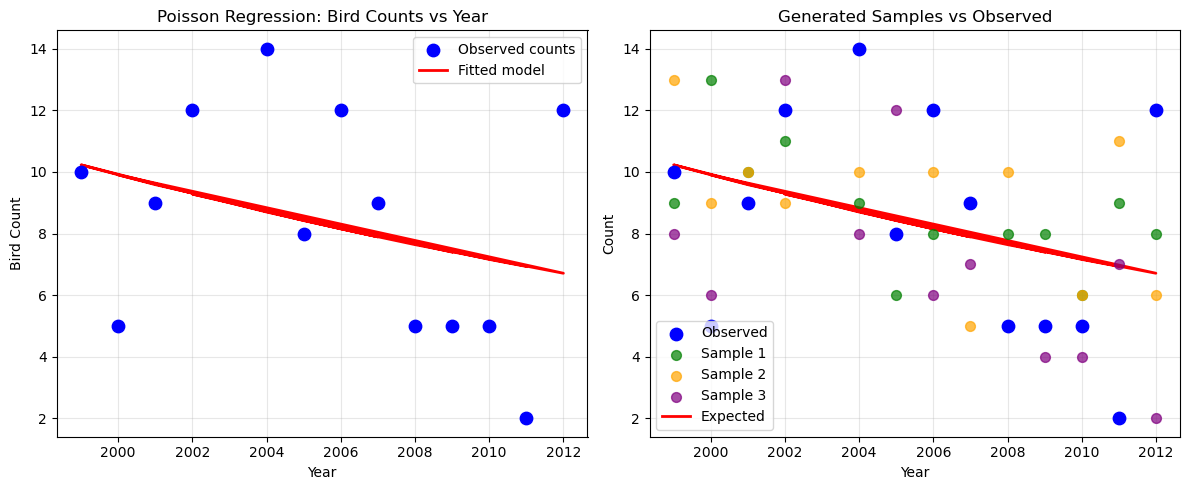

In [40]:
# Create a simple plot showing the data and fitted line
plt.figure(figsize=(12, 5))

# Left plot: Original data and fitted line
plt.subplot(1, 2, 1)
    
# Plot observed data
plt.scatter(years, counts, color='blue', s=80, label='Observed counts', zorder=3)
    
# Plot fitted line
plt.plot(years, lambda_fitted, 'red', linewidth=2, label='Fitted model', zorder=2)
    
plt.xlabel('Year')
plt.ylabel('Bird Count')
plt.title('Poisson Regression: Bird Counts vs Year')
plt.legend()
plt.grid(True, alpha=0.3)
    
# Right plot: Generated samples
plt.subplot(1, 2, 2)
    
# Plot observed data
plt.scatter(years, counts, color='blue', s=80, label='Observed', zorder=4)
    
# Plot the 3 samples
colors = ['green', 'orange', 'purple']
for i, color in enumerate(colors):
  plt.scatter(years, samples[f'sample_{i+1}'], 
      color=color, s=50, alpha=0.7, 
        label=f'Sample {i+1}', zorder=3)
    
# Plot fitted line
plt.plot(years, lambda_fitted, 'red', linewidth=2, label='Expected', zorder=2)
    
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Generated Samples vs Observed')
plt.legend()
plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.savefig('poisson_regression_plot.png', dpi=150, bbox_inches='tight')
plt.show()